In [1]:
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam #since we want to modify our leaning rate for our optimizer so functional API call

#ENCODER MODEL

In [4]:
# The input is (28,28) instead of (784) because we are using Conv layers 
encoder_input = Input(shape=(28,28,1), name="encoder_input")

In [5]:
#The encoder
encoder_conv_layer1 = Conv2D(32,(3,3),name="encoder_conv")(encoder_input)
encoder_activ_layer1 = LeakyReLU(name="encoder_leakyrelu_1")(encoder_conv_layer1)

encoder_dense_layer2 = Dense(units=10, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = LeakyReLU(name="encoder_output")(encoder_dense_layer2)

In [6]:
encoder = Model(encoder_input, encoder_output, name="encoder_model")

In [7]:
#The parameters in the encoder model
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder_conv (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
encoder_leakyrelu_1 (LeakyRe (None, 26, 26, 32)        0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 26, 26, 10)        330       
_________________________________________________________________
encoder_output (LeakyReLU)   (None, 26, 26, 10)        0         
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


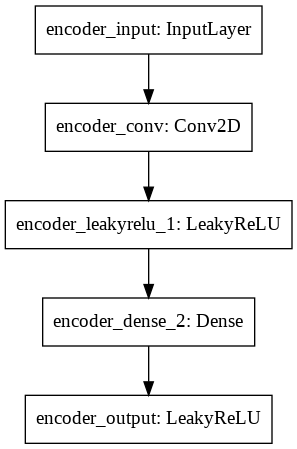

In [8]:
#Model structure
plot_model(encoder)

#DECODER MODEL

In [13]:
#Decoder Input
decoder_input = Input(shape=(26,26,10),name="decoder_input")

In [14]:
#The decoder
decoder_conv_layer1 = Conv2DTranspose(32,(3,3), name="decoder_convtranspose")(decoder_input)
decoder_activ_layer1 = LeakyReLU(name="decoder_leakyrelu_1")(decoder_conv_layer1)

decoder_dense_layer2 = Dense(units=1, name="decoder_dense_2")(decoder_activ_layer1) #We want to get the orginal vector back
decoder_output = LeakyReLU(name="decoder_output")(decoder_dense_layer2)

In [15]:
decoder = Model(decoder_input,decoder_output,name="Decoder")

In [16]:
#The decoder model parameters
decoder.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 26, 26, 10)]      0         
_________________________________________________________________
decoder_convtranspose (Conv2 (None, 28, 28, 32)        2912      
_________________________________________________________________
decoder_leakyrelu_1 (LeakyRe (None, 28, 28, 32)        0         
_________________________________________________________________
decoder_dense_2 (Dense)      (None, 28, 28, 1)         33        
_________________________________________________________________
decoder_output (LeakyReLU)   (None, 28, 28, 1)         0         
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


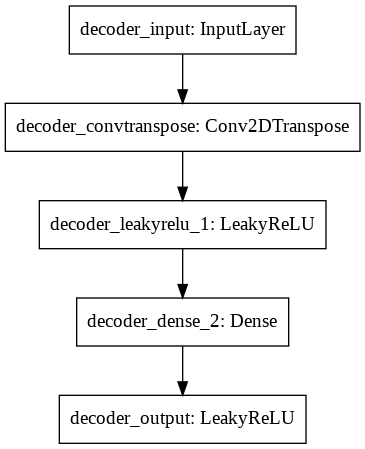

In [17]:
#Decoder model
plot_model(decoder)

#The Complete AutoEncoder Model

In [18]:
AutoEncoder_output = decoder(encoder(encoder_input))

In [19]:
#The autoencoder model
AutoEncoder = Model(encoder_input,AutoEncoder_output,name="Autoencoder")

In [20]:
#Autoencoder parameters
AutoEncoder.summary()

Model: "Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder_model (Functional)   (None, 26, 26, 10)        650       
_________________________________________________________________
Decoder (Functional)         (None, 28, 28, 1)         2945      
Total params: 3,595
Trainable params: 3,595
Non-trainable params: 0
_________________________________________________________________


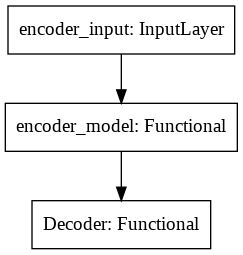

In [21]:
#Autoencoder layers
plot_model(AutoEncoder)

### Compiling the autoencoder model

In [22]:
AutoEncoder.compile(optimizer=Adam(learning_rate=0.0005),loss='mse')

# Loading the data

In [23]:
from tensorflow.keras.datasets.mnist import load_data #we used the mnist dataset
import numpy as np

In [24]:
(x_train_orig,y_train),(x_test_orig,y_test) = load_data() #downloading the data

11493376/11490434 [==============================] - 0s 0us/step


In [25]:
x_train_orig.shape, x_test_orig.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
#Normalising the pixels of the images
x_train_orig = x_train_orig.astype('float32')/255.0
x_test_orig = x_test_orig.astype('float32')/255.0

In [27]:
#Since the images are in a matrix so converting them into a vector
x_train = x_train_orig.reshape((x_train_orig.shape[0],28,28,1))
x_test = x_test_orig.reshape((x_test_orig.shape[0],28,28,1))

In [28]:
#new shapes
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [29]:
#Now that our data is in vector order, we provide it as an input and train our model

#The labels y have not been given because we don't need that
AutoEncoder.fit(x_train,x_train,batch_size=256,epochs=20,shuffle=True,validation_data=(x_test,x_test),verbose = 1)

Epoch 1/20
235/235 [==============================] - 35s 25ms/step - loss: 0.0106 - val_loss: 8.9230e-04
Epoch 2/20
235/235 [==============================] - 5s 23ms/step - loss: 3.9247e-04 - val_loss: 1.6438e-04
Epoch 3/20
235/235 [==============================] - 5s 23ms/step - loss: 1.2240e-04 - val_loss: 9.3285e-05
Epoch 4/20
235/235 [==============================] - 5s 23ms/step - loss: 8.1611e-05 - val_loss: 6.8493e-05
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 6.2239e-05 - val_loss: 5.3838e-05
Epoch 6/20
235/235 [==============================] - 5s 23ms/step - loss: 4.9864e-05 - val_loss: 4.3878e-05
Epoch 7/20
235/235 [==============================] - 5s 23ms/step - loss: 4.0988e-05 - val_loss: 3.6405e-05
Epoch 8/20
235/235 [==============================] - 6s 24ms/step - loss: 3.4284e-05 - val_loss: 3.0833e-05
Epoch 9/20
235/235 [==============================] - 5s 23ms/step - loss: 2.9309e-05 - val_loss: 2.6725e-05
Epoch 10/20
235/235 [=

## Predicting using Encoder and Decoder independently

In [30]:
#Now we predict first using the encoder model to get a vector of 10 latent features
encoder_prediction = encoder.predict(x_train)

In [31]:
#Predciting the decoder output using the output of the encoder which generates an image along with the depth channel of 1  
decoder_prediction = decoder.predict(encoder_prediction)

In [32]:
#Converting the image vector to a matrix
decoder_images =  decoder_prediction.reshape((decoder_prediction.shape[0],28,28))

In [35]:
import matplotlib

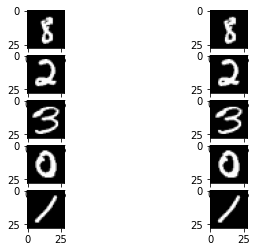

In [36]:
#Plotting the output
num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = np.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoder_images[rand_ind, :, :], cmap="gray")

### Note: The quality of images are much better than Vanilla AE because we used CNN and also used more latent features

## Predicting using complete Model

In [39]:
#Predicitng using the Overall Model
#Since we want to generate the images themselevs, so we predict on x_train again
autoencoder_output_vector = AutoEncoder.predict(x_train)

In [40]:
#Converting vector to matrix
autoencoder_images = autoencoder_output_vector.reshape((autoencoder_output_vector.shape[0],28,28))

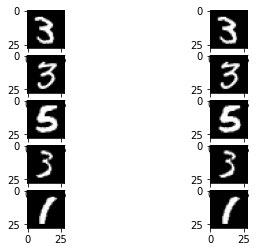

In [41]:
#Plotting these images
num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = np.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(autoencoder_images[rand_ind, :, :], cmap="gray")